# Optimizer : Gradient descent 
### for finding the optimized w and b values efficiently

In [1]:
import pandas as pd

output_path = './Salary_Data.csv'

path = output_path
df = pd.read_csv(output_path)

# y = w*x + b
x = df["YearsExperience"]
y = df["Salary"]
df.head(5)

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2


## Gradient of cost
### y = ax + b
### cost = (y_real - y_predic) = (y_real - wx - b)**2
### w_gradient = Dcost/Dw = -2x(y - wx - b)
### b_gradient = Dcost/Db-2(y - wx - b)

In [2]:
def compute_gradient(x, y, w, b):
  w_gradient = (x*(w*x+b -y)).mean()
  b_gradient = (w*x+b -y).mean()
  return w_gradient, b_gradient

In [3]:
compute_gradient(x, y, 20, 10)

(268.54757575757577, 35.084848484848486)

In [5]:
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)
# or 
# cost = ((y - y_pred)**2).mean()

  return cost

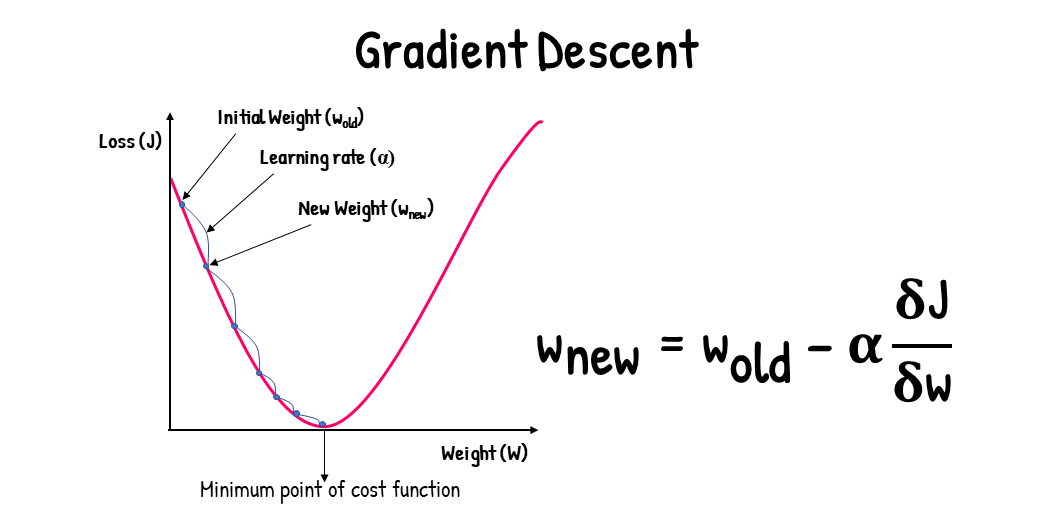

In [6]:
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):

  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)

    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter == 0:
      print(f"Iteration {i:5} : Cost {cost: .4e}, w: {w: .2e}, b: {b: .2e}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [6]:
w_init = 0
b_init = 0
learning_rate = 1.0e-3
run_iter = 20000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Iteration     0 : Cost  5.6568e+03, w:  4.36e-01, b:  7.26e-02, w_gradient: -4.36e+02, b_gradient: -7.26e+01
Iteration  1000 : Cost  1.4097e+02, w:  1.21e+01, b:  8.07e+00, w_gradient:  8.00e-01, b_gradient: -5.32e+00
Iteration  2000 : Cost  9.6063e+01, w:  1.14e+01, b:  1.27e+01, w_gradient:  6.12e-01, b_gradient: -4.08e+00
Iteration  3000 : Cost  6.9732e+01, w:  1.09e+01, b:  1.63e+01, w_gradient:  4.69e-01, b_gradient: -3.12e+00
Iteration  4000 : Cost  5.4293e+01, w:  1.05e+01, b:  1.91e+01, w_gradient:  3.59e-01, b_gradient: -2.39e+00
Iteration  5000 : Cost  4.5241e+01, w:  1.02e+01, b:  2.12e+01, w_gradient:  2.75e-01, b_gradient: -1.83e+00
Iteration  6000 : Cost  3.9933e+01, w:  9.91e+00, b:  2.28e+01, w_gradient:  2.10e-01, b_gradient: -1.40e+00
Iteration  7000 : Cost  3.6821e+01, w:  9.73e+00, b:  2.40e+01, w_gradient:  1.61e-01, b_gradient: -1.07e+00
Iteration  8000 : Cost  3.4996e+01, w:  9.59e+00, b:  2.49e+01, w_gradient:  1.23e-01, b_gradient: -8.22e-01
Iteration  9000 : C

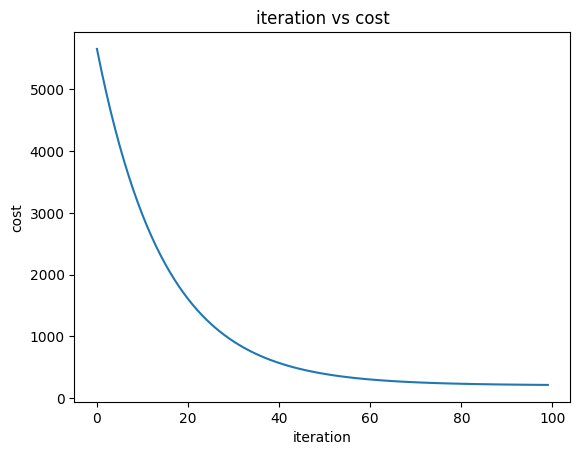

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, 100), c_hist[:100])
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()


In [8]:
print(f"最終w b=({w_final:.2f}, {b_final:.2f})")

最終w b=(9.14, 27.89)


In [9]:
print(f"年資3.5  預測薪水:{w_final*3.5 + b_final:.1f}K")
print(f"年資5.9  預測薪水:{w_final*5.9 + b_final:.1f}K")

年資3.5  預測薪水:59.9K
年資5.9  預測薪水:81.8K


In [10]:
# w=-100~100 b=-100~100 的 cost
import numpy as np

ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

NameError: name 'w_hist' is not defined

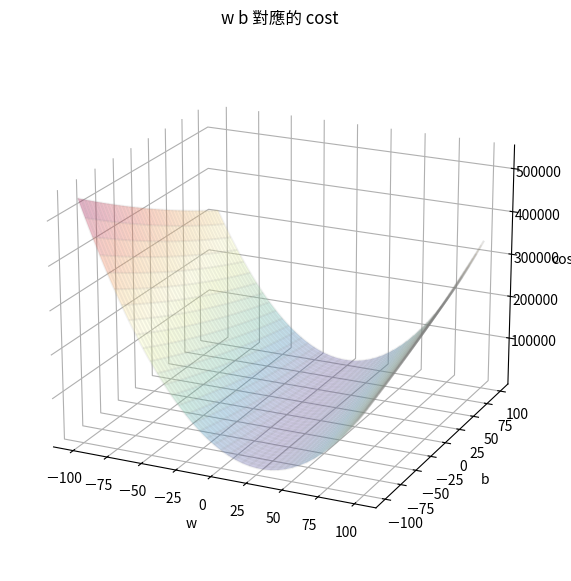

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.view_init(20, -65)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0))

b_grid, w_grid = np.meshgrid(bs, ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/

# ax.plot_surface(w_grid, b_grid, costs,  alpha=0.3)
ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.3)
ax.plot_wireframe(w_grid, b_grid, costs, color="grey", alpha=0.1)

ax.set_title("w b 對應的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(w_hist[-1], b_hist[-1], c_hist[-1], color="red", s=40)
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="green", s=40)
ax.plot(w_hist, b_hist, c_hist)

plt.show()